In [1]:
pip install telethon pandas nltk scikit-learn matplotlib seaborn


     ---------------------------------------- 0.0/620.2 kB ? eta -:--:--
     - ----------------------------------- 30.7/620.2 kB 435.7 kB/s eta 0:00:02
     --- --------------------------------- 61.4/620.2 kB 812.7 kB/s eta 0:00:01
     ----- ------------------------------ 102.4/620.2 kB 737.3 kB/s eta 0:00:01
     ---------- ------------------------- 184.3/620.2 kB 926.0 kB/s eta 0:00:01
     -------------------- ----------------- 327.7/620.2 kB 1.4 MB/s eta 0:00:01
     --------------------------------- ---- 553.0/620.2 kB 1.9 MB/s eta 0:00:01
     -------------------------------------  614.4/620.2 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 620.2/620.2 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (py

In [6]:
import nest_asyncio
import asyncio
from telethon import TelegramClient
import pandas as pd

# Apply the nest_asyncio fix
nest_asyncio.apply()

# Set up Telegram API credentials
api_id = '21682142'
api_hash = '735aba550fd14057c8c1c3a268037f55'
channel_link = 'https://t.me/STOCKGAINERSS'  # Replace with your Telegram channel link

# Create Telegram client
client = TelegramClient('session_name_1', api_id, api_hash)

# Function to scrape Telegram messages
async def scrape_messages():
    # Fetch the entity using the channel link
    entity = await client.get_entity(channel_link)
    
    messages = []
    async for message in client.iter_messages(entity, limit=1000):  # Use the entity instead of username
        if message.message:
            messages.append(message.message)

    # Save messages to a CSV
    df = pd.DataFrame(messages, columns=['message'])
    df.to_csv('telegram_data.csv', index=False)
    print('Scraping complete. Data saved to telegram_data.csv.')

# Main async function to start scraping
async def main():
    async with client:
        await scrape_messages()

# If an event loop is already running, use this approach
if __name__ == "__main__":
    try:
        asyncio.run(main())  # Works if there's no running loop
    except RuntimeError:
        # If an event loop is already running, use this:
        loop = asyncio.get_event_loop()
        loop.run_until_complete(main())


Please enter your phone (or bot token):  +919096090141


Server closed the connection: [WinError 64] The specified network name is no longer available


Please enter the code you received:  56331


Server closed the connection: [WinError 64] The specified network name is no longer available


Signed in successfully as Terror; remember to not break the ToS or you will risk an account ban!


C:\Anaconda\Lib\site-packages\telethon\extensions\binaryreader.py:56: RuntimeWarning: coroutine 'main' was never awaited
  def read(self, length=-1):


Scraping complete. Data saved to telegram_data.csv.


Step 2: Data cleaning and preprocessing

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stopwords dataset

# Load the scraped Telegram data from CSV
df = pd.read_csv('telegram_data.csv')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Lowercase all words
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply text cleaning to the dataframe
df['cleaned_message'] = df['message'].apply(clean_text)
df = df.dropna()  # Remove rows with missing values

# Save cleaned data to CSV
df.to_csv('cleaned_telegram_data.csv', index=False)

# Preview cleaned data
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


                                             message  \
0  ARKADE DEVELOPER LTD\n\nPosted Very Strong Res...   
1  Stock Gainers (SEBI REGISTERED)\n⭐️Live Analys...   
2                                 POCL\n\nDAY HIGH 🔥   
3  OPTION BUYING \n\nLUPIN 2100CE\n\nCMP 92-93\n\...   
4  WHILE THE STOCK MAKES THE MOVEMENT\n\nYOU CAN ...   

                                     cleaned_message  
0  arkade developer ltd posted strong results tom...  
1  stock gainers sebi registered live analysis 10...  
2                                      pocl day high  
3  option buying lupin 2100ce cmp 9293 support 77...  
4  stock makes movement join prime group get entr...  


[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
import pandas as pd

# Load the scraped Telegram data from CSV
df = pd.read_csv('telegram_data.csv')

# Display the first few rows of the raw data to inspect the content
print("First few rows of raw messages from Telegram:")
print(df.head())

# Check for missing or empty messages
print("Check for missing values:")
print(df.isnull().sum())


First few rows of raw messages from Telegram:
                                             message
0  ARKADE DEVELOPER LTD\n\nPosted Very Strong Res...
1  Stock Gainers (SEBI REGISTERED)\n⭐️Live Analys...
2                                 POCL\n\nDAY HIGH 🔥
3  OPTION BUYING \n\nLUPIN 2100CE\n\nCMP 92-93\n\...
4  WHILE THE STOCK MAKES THE MOVEMENT\n\nYOU CAN ...
Check for missing values:
message    0
dtype: int64


Sentiment Analysis

In [24]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load the scraped Telegram data
df = pd.read_csv('telegram_data.csv')

# Check if DataFrame loaded correctly
print("Columns in the DataFrame:")
print(df.columns)

# Define stock keywords to look for
stock_keywords = ['TRENT', 'PFC', 'BLUEDART', 'OBEROIRLTY']  # Add more stocks as needed

# Function to extract stock mentions
def extract_stock_mentions(text):
    pattern = r'\b(' + '|'.join(stock_keywords) + r')\b'  # Create regex pattern for the keywords
    match = re.search(pattern, text.upper())  # Search for the pattern in the text
    if match:
        return match.group(0)  # Return the matched stock keyword
    return None

# Apply the extraction function
df['stock_mentions'] = df['message'].apply(extract_stock_mentions)

# Check for stock mentions
print("\nRows where stock mentions were detected:")
stock_mentions_df = df[df['stock_mentions'].notnull()]
print(stock_mentions_df[['message', 'stock_mentions']])

# Count total stock mentions detected
total_mentions = stock_mentions_df['stock_mentions'].count()
print(f"Total number of stock mentions detected: {total_mentions}")

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the original messages
df['sentiment_label'] = df['message'].apply(analyze_sentiment)

# Now combine stock mentions and sentiment labels
stock_sentiment_df = df[df['stock_mentions'].notnull()]

# Group by stock and sentiment
stock_sentiment = stock_sentiment_df.groupby(['stock_mentions', 'sentiment_label']).size().unstack(fill_value=0)

# Output the stock sentiment analysis result
print("\nStock Sentiment Analysis Result:")
print(stock_sentiment)


Columns in the DataFrame:
Index(['message'], dtype='object')

Rows where stock mentions were detected:
                                               message stock_mentions
41   Stock Gainers (SEBI REGISTERED)\n⭐️Live Analys...          TRENT
44                                            TRENT 🔥🔥          TRENT
45                       TRENT \n\nLOOKING \nGOOD BTST          TRENT
47                    TRENT\n\nTOMM 8300-8400 possible          TRENT
48   ONe more\n\nBTST\n\nVIEW\n\nTRENT 8100CE\n\nCM...          TRENT
62   OPTION BUYING VIEW \n\nTRENT 7800CE\n\n292 TO ...          TRENT
67   OPTION BUYING \n\nTRENT 7800CE\n\n295 to 325\n...          TRENT
68                TRENT \n\nSHOWING VERY GOOD STRENGTH          TRENT
69   OPTION BUYING VIEW \n\nTRENT 7800CE\n\nCMP 292...          TRENT
85                                            BLUEDART       BLUEDART
90   Good Stocks available at attractive levels \n\...          TRENT
142            GAIL \nPFC\n\nDAY HIGH \n\nPERFECT VIEW   

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


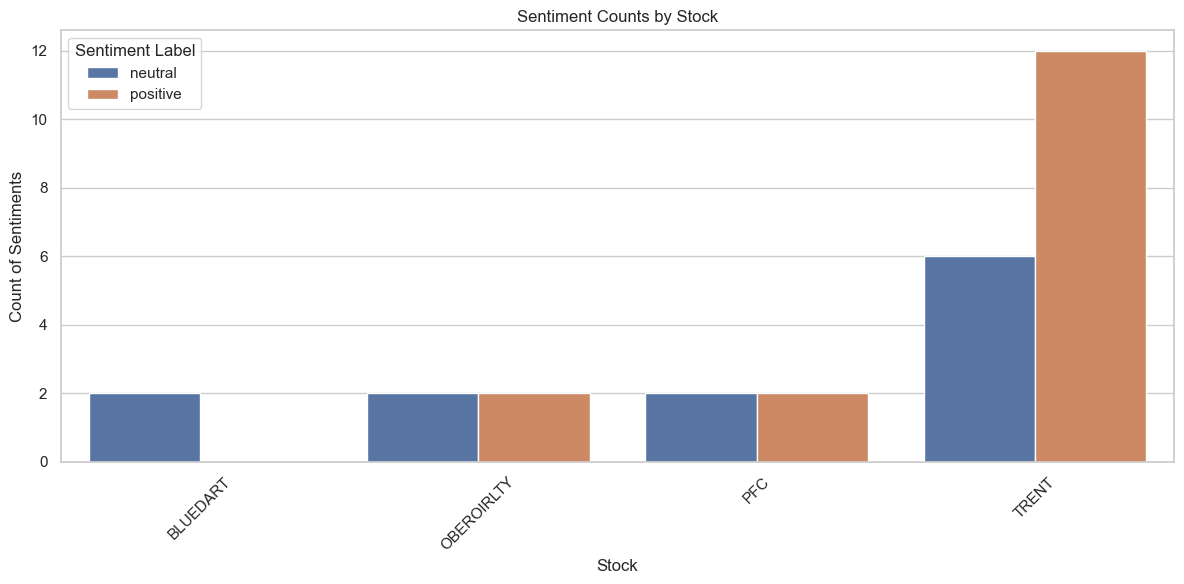


Report Findings:
BLUEDART: Positive Sentiment: 0, Negative Sentiment: 0, Neutral Sentiment: 2
OBEROIRLTY: Positive Sentiment: 2, Negative Sentiment: 0, Neutral Sentiment: 2
PFC: Positive Sentiment: 2, Negative Sentiment: 0, Neutral Sentiment: 2
TRENT: Positive Sentiment: 12, Negative Sentiment: 0, Neutral Sentiment: 6


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots are styled nicely
sns.set(style="whitegrid")

# Step 4.1: Create a DataFrame to summarize sentiment counts for each stock
sentiment_summary = stock_sentiment_df.groupby(['stock_mentions', 'sentiment_label']).size().reset_index(name='count')

# Step 4.2: Create a bar plot for sentiment counts by stock
plt.figure(figsize=(12, 6))
sns.barplot(x='stock_mentions', y='count', hue='sentiment_label', data=sentiment_summary)
plt.title('Sentiment Counts by Stock')
plt.xlabel('Stock')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()



# Step 4.4: Report findings
print("\nReport Findings:")
for stock in stock_sentiment.index:
    positive_count = stock_sentiment.loc[stock, 'positive'] if 'positive' in stock_sentiment.columns else 0
    negative_count = stock_sentiment.loc[stock, 'negative'] if 'negative' in stock_sentiment.columns else 0
    neutral_count = stock_sentiment.loc[stock, 'neutral'] if 'neutral' in stock_sentiment.columns else 0
    
    total_mentions = positive_count + negative_count + neutral_count
    if total_mentions > 0:
        print(f"{stock}: Positive Sentiment: {positive_count}, Negative Sentiment: {negative_count}, Neutral Sentiment: {neutral_count}")
        if negative_count > positive_count:
            print(f"  **Recommendation: Caution advised for {stock} due to negative sentiment.**")



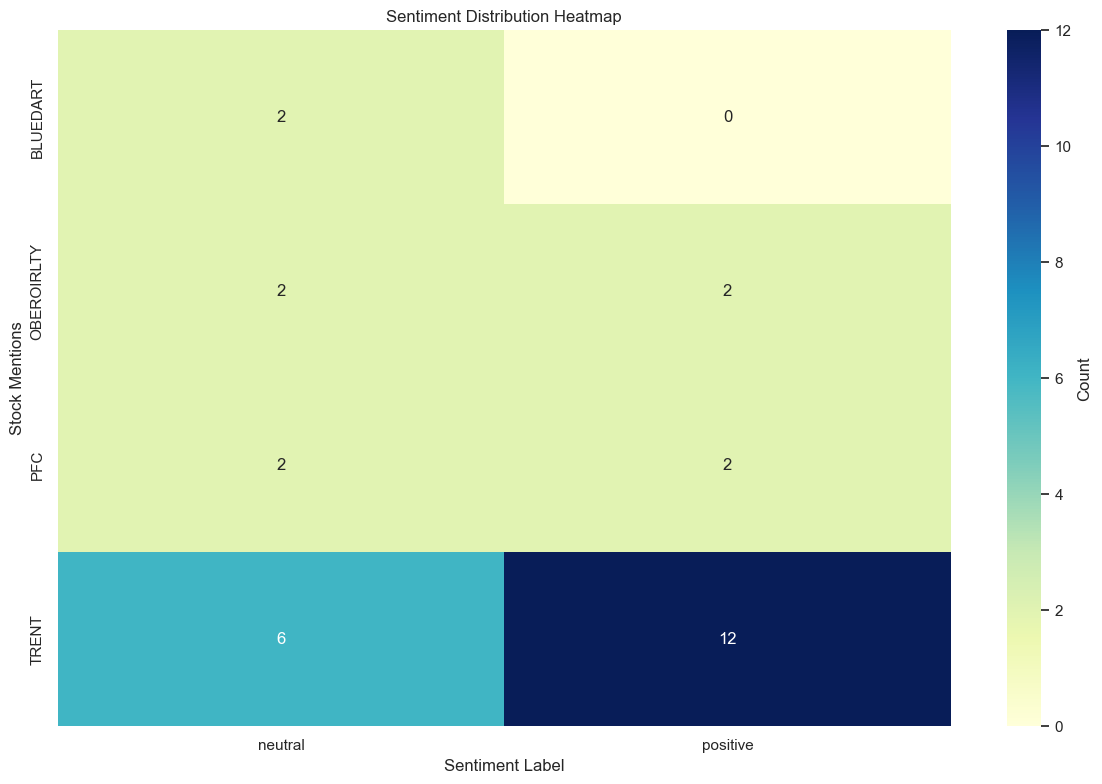

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sentiment_summary' is a DataFrame with the structure:
# Columns: ['stock_mentions', 'sentiment_label', 'count']

# Step 4.5: Create a heatmap for sentiment distribution
# Create a pivot table for the heatmap
heatmap_data = sentiment_summary.pivot(index="stock_mentions", columns="sentiment_label", values="count").fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Sentiment Distribution Heatmap')
plt.xlabel('Sentiment Label')
plt.ylabel('Stock Mentions')
plt.tight_layout()
plt.show()


Generate Actionable Insights from Sentiment Analysis

In [32]:
# Step 5: Generate Actionable Insights from Sentiment Analysis

# Define a function to analyze insights based on sentiment
def generate_insights(sentiment_summary):
    insights = []
    
    # Define thresholds for strong sentiment
    positive_threshold = 10  # Example threshold for positive sentiment
    negative_threshold = 5    # Example threshold for negative sentiment

    print("Sentiment Summary DataFrame:")
    print(sentiment_summary)  # Print the sentiment summary for debugging

    # Iterate over stock mentions to generate insights
    for stock in sentiment_summary['stock_mentions'].unique():
        stock_data = sentiment_summary[sentiment_summary['stock_mentions'] == stock]
        
        # Check for significant positive sentiment
        if 'Positive' in stock_data['sentiment_label'].values:
            positive_count = stock_data.loc[stock_data['sentiment_label'] == 'Positive', 'count'].values[0]
            print(f"Positive mentions for {stock}: {positive_count}")  # Debug output
            if positive_count >= positive_threshold:
                insights.append(f"Consider buying {stock}: Strong positive sentiment with {positive_count} mentions.")
        
        # Check for significant negative sentiment
        if 'Negative' in stock_data['sentiment_label'].values:
            negative_count = stock_data.loc[stock_data['sentiment_label'] == 'Negative', 'count'].values[0]
            print(f"Negative mentions for {stock}: {negative_count}")  # Debug output
            if negative_count >= negative_threshold:
                insights.append(f"Consider selling {stock}: Strong negative sentiment with {negative_count} mentions.")

    return insights

# Generate insights
insights = generate_insights(sentiment_summary)

# Print the generated insights
if insights:
    for insight in insights:
        print(insight)
else:
    print("No actionable insights generated.")


Sentiment Summary DataFrame:
  stock_mentions sentiment_label  count
0       BLUEDART         neutral      2
1     OBEROIRLTY         neutral      2
2     OBEROIRLTY        positive      2
3            PFC         neutral      2
4            PFC        positive      2
5          TRENT         neutral      6
6          TRENT        positive     12
No actionable insights generated.


Accuracy Check 